### Projeto de Disciplina - Algoritmos de Inteligência Artificial para clusterização [25E4_2]
##### Aluna: Rosana Ribeiro Lima

O código e demais artefatos deste projeto se encontram disponibilizados em https://github.com/roriblim/PD-algoritmos-clusterizacao

#### Parte 1

O projeto foi desenvolvido dentro de um ambiente virtual Python 3.12, criado por meio do Anaconda versão 25.5.1. As bibliotecas e dependências encontram-se no requirements.txt, que foi criado a partir do requirements.in. Mais detalhes sobre a configuração feita e sobre como o ambiente foi montado encontram-se no README do projeto Github mencionado acima.

- Captura de tela do ambiente rodando na minha máquina:

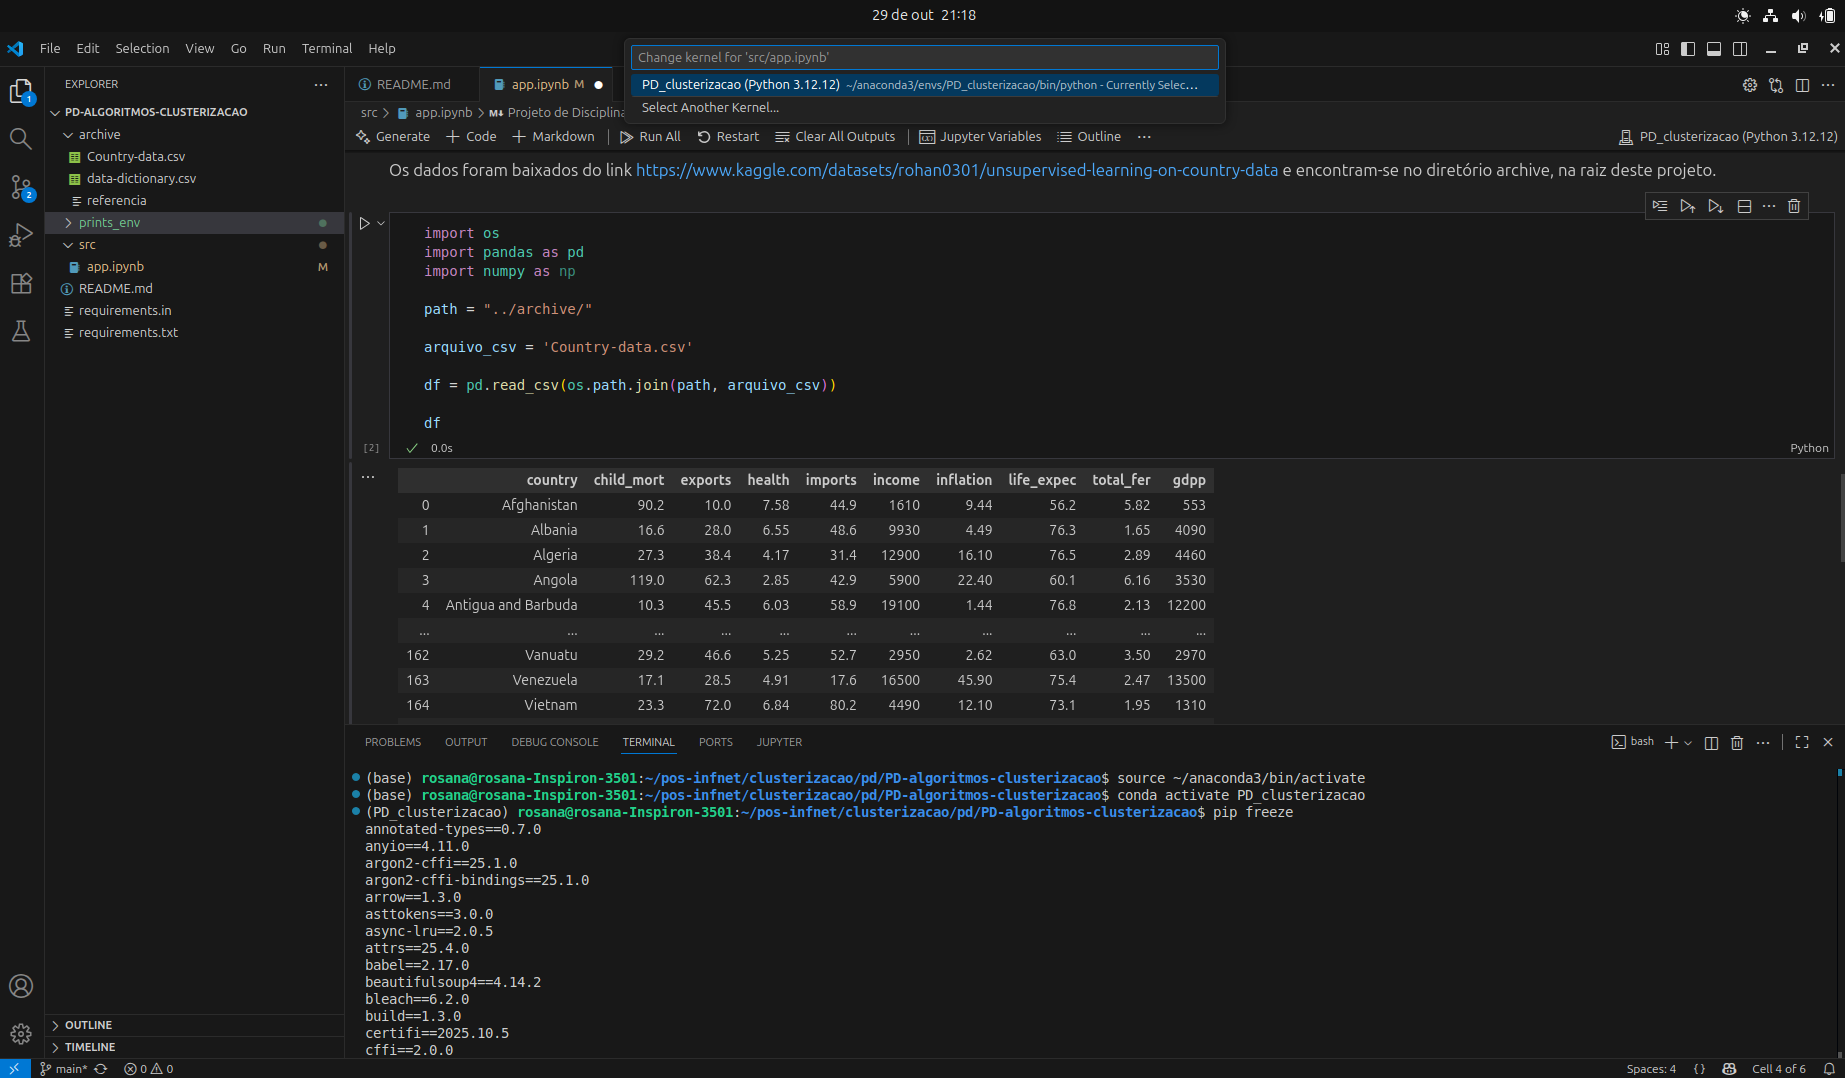

#### Parte 2
2.1.
Os dados foram baixados do link https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data e encontram-se no diretório archive, na raiz deste projeto.

In [2]:
import os
import pandas as pd
import numpy as np

path = "../archive/"

arquivo_csv = 'Country-data.csv'

df = pd.read_csv(os.path.join(path, arquivo_csv))

df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


2.2. A fim de avaliar quantos países únicos existem no dataset, podemos fazer uma análise pela coluna "country", tanto por meio do value_counts() quanto por meio do nunique(). Após essa análise, é possível verificar que existem 167 países no dataset:

In [3]:

n_paises = df['country'].nunique()
print(df['country'].value_counts())
print(f"Número de países únicos: {n_paises}")


country
Afghanistan            1
Albania                1
Algeria                1
Angola                 1
Antigua and Barbuda    1
                      ..
Vanuatu                1
Venezuela              1
Vietnam                1
Yemen                  1
Zambia                 1
Name: count, Length: 167, dtype: int64
Número de países únicos: 167


2.3. A fim de mostrar através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização e analisar, vamos optar por realizar dois tipos de gráficos:
- boxplot
- histograma

Antes disso, porém, é necessário identificar quais variáveis serão utilizadas clusterização. No caso, convém utilizar todas as variáveis numéricas.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Identificamos que apenas country é uma variável nominal, e por isso não será utilizada na clusterização.

In [5]:
num_cols = df.select_dtypes(include=["number"]).columns
print('colunas numéricas, a serem utilizadas na clusterização:', num_cols.tolist() )

colunas numéricas, a serem utilizadas na clusterização: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


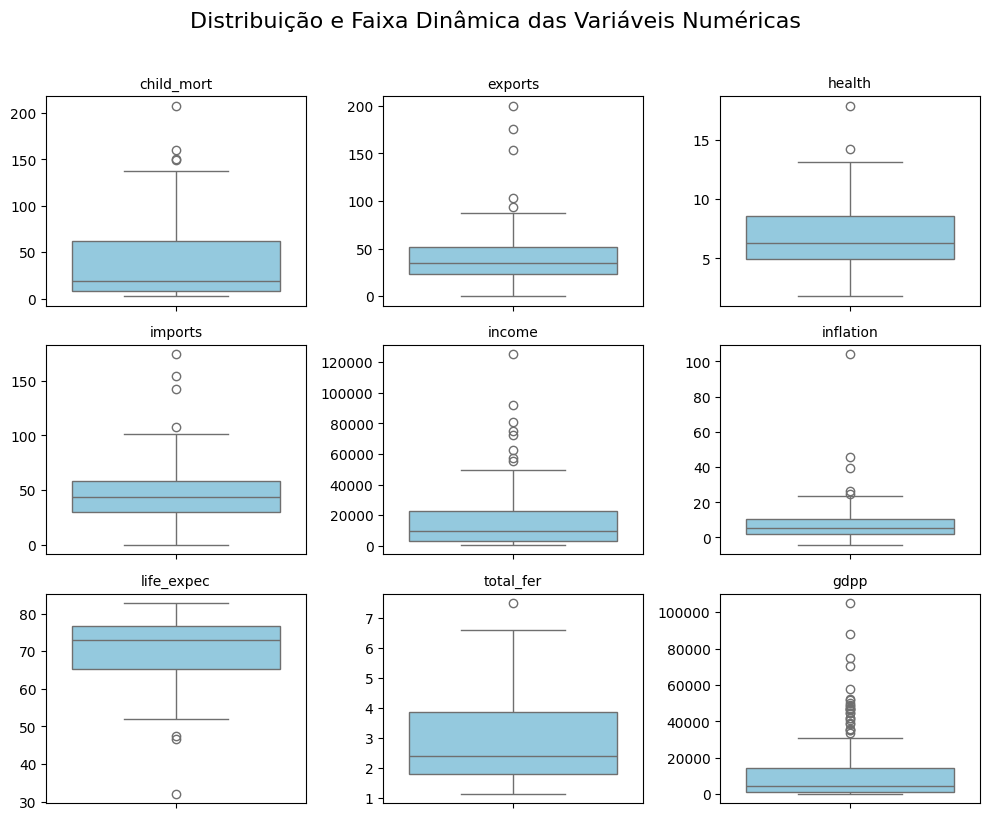

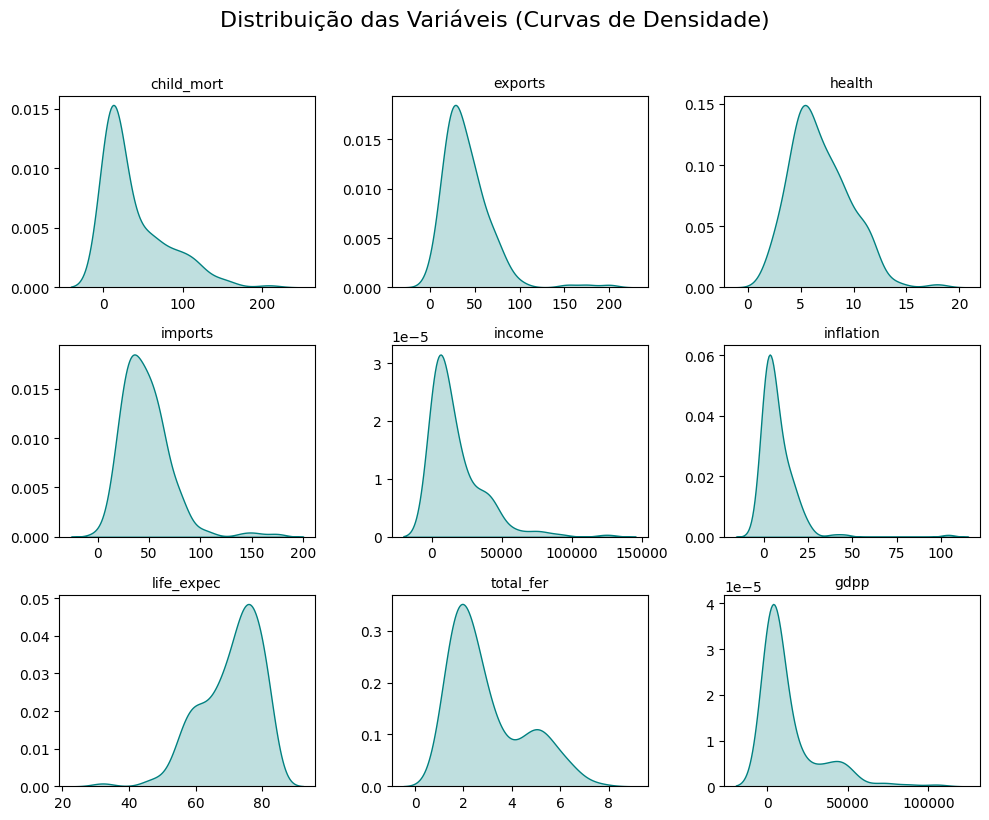

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- BOXPLOTS (verticais em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição e Faixa Dinâmica das Variáveis Numéricas", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis (Curvas de Densidade)", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(df[col], fill=True, ax=axes[i], color="teal")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()


##### Análise

Dos resultados dos histogramas e do boxplot, é possível fazer algumas observações:
- as escalas das variáveis são muito diferentes. Por exemplo, se compararmos o boxplot de income e de total_fer, veremos que as escalas são muito distintas (o primeiro tem valores muito mais elevados que o segundo). Isso pode interferir na clusterização ao usar algoritmos baseados em distância. Será necessário algum tipo de escalonamento para lidar com essa diferença;
- grande presença de outliers, que pode ser observado também nos boxplots, principalmente nos de gdpp, income e inflação. Isso mostra que será necessário adotar alguma estratégia para lidar com os outliers;
- pelos histogramas, é possível ver que, em geral, os dados seguem uma distribuição semelhante à distribuição normal. Assim, os principais ajustes necessários serão os já mencionados ajustes de outliers e de escala.

Uma opção então, que pode resolver o escalonamento e também lidar bem com os outliers é o RobustScaler. Isso porque o RobustScaler consegue lidar bem com outliers ao levar em consideração a mediana em vez da média e o intervalo interquartil em vez do desvio-padrão. Mas para confirmar essa opção, vamos fazer mais uma análise nos dados, que é a análise dos quartis e da mediana na distribuição de cada variável:

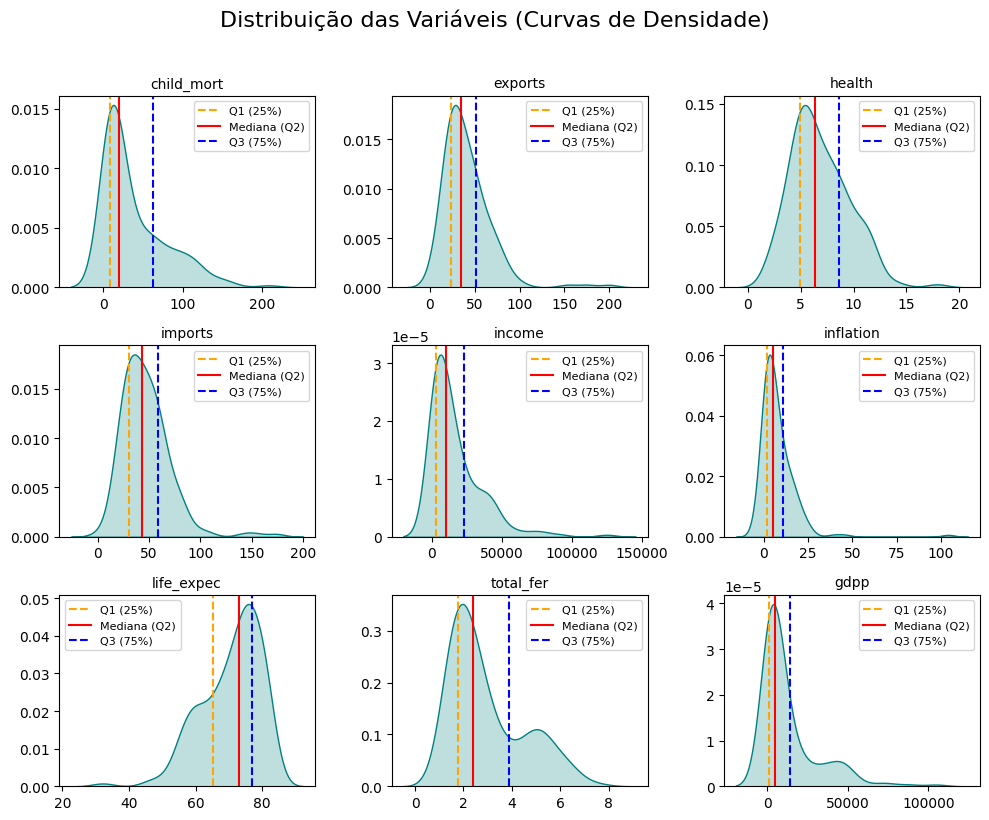

In [ ]:
# --- HISTOGRAMAS CONTÍNUOS (curvas de densidade em grade 3x3)
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("Distribuição das Variáveis (Curvas de Densidade)", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(df[col], fill=True, ax=axes[i], color="teal")
    
    q1 = df[col].quantile(0.25)
    median = df[col].median()
    q3 = df[col].quantile(0.75)

    axes[i].axvline(q1, color="orange", linestyle="--", linewidth=1.5, label="Q1 (25%)")
    axes[i].axvline(median, color="red", linestyle="-", linewidth=1.5, label="Mediana (Q2)")
    axes[i].axvline(q3, color="blue", linestyle="--", linewidth=1.5, label="Q3 (75%)")
    
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.show()

Pelos gráficos agora da distribuição mostrando as medianas e os Q1 e Q3, é possível confirmar então que o RobustScaler será uma boa forma de lidar com as diferenças de escala e com os outliers. Isso ocorre porque o escalonamento com o Robust Scaler é feito com essas medidas, que são 